In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

####  EDA 
* Load the data.
* Look at the median_house_value variable. Does it have a long tail?

In [222]:
data=pd.read_csv("C:/Users/mamun/OneDrive/Desktop/Data_science_project/ML Zoomcamp/housing.csv")
df=data.copy()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


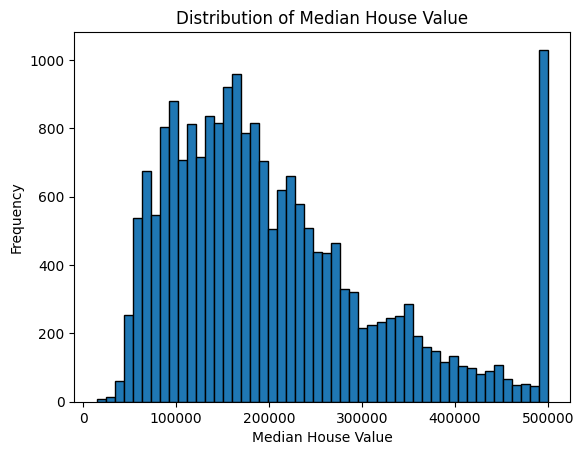

In [223]:
import matplotlib.pyplot as plt

# Plot a histogram of the median_house_value variable
plt.hist(data["median_house_value"], bins=50, edgecolor='k')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()

The median house value displays a long tail on its distribution.

### Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [224]:
# Filter records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
filtered_df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

# Select the desired columns
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

df = filtered_df[selected_columns]

### Question 1
#### There's one feature with missing values. What is it?

In [225]:
# Check for missing values
missing_values=df_filtered.isna().sum()
# Print the columns with missing values
print(missing_values[missing_values > 0])

total_bedrooms    157
dtype: int64


### Question 2
#### What's the median (50% percentile) for variable 'population'?

In [226]:
# Calculate the median for the 'population' variable
median_population = df['population'].median()

print("Median population:", median_population)

Median population: 1195.0


#### Prepare and split the dataset
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

# Prepare and split the dataset 

In [227]:
# Shuffle the data:

np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# Data split
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

print(f"length of training set = {len(df_train)}")
print(f"length of validation set = {len(df_val)}")
print(f"length of test set = {len(df_test)}")

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

length of training set = 9413
length of validation set = 3137
length of test set = 3137


In [228]:

# Applying a logarithmic transformation to the median_house_value variable using the function np.log1p()
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [229]:
def prepare_X_null(df):
    #  function to prepare dataset with 0
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X


def prepare_X_mean(df):
    # function to prepare dataset with mean
    df = df.copy()
    mean = df.total_bedrooms.mean()
    df.total_bedrooms = df.total_bedrooms.fillna(mean)
    X = df.values
    return X


In [230]:
def train_linear_regression(X, y):
    # function to train the Linear Regression model
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w
     

In [231]:

def rmse(y, y_pred):
    # function calculated RMSE
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# for options with 0
X_null_train = prepare_X_null(df_train)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X_null(df_val)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

rmse_option_null = np.round(rmse(y_val, y_null_pred_val),2)

# for options with mean

X_mean_train = prepare_X_mean(df_train)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X_mean(df_val)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

rmse_option_mean = np.round(rmse(y_val, y_mean_pred_val),2)

print(f"RMSE score for option_null = {rmse_option_null}")
print(f"RMSE score for option_mean = {rmse_option_mean}")

RMSE score for option_null = 0.34
RMSE score for option_mean = 0.34


#### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?

####  Regularization

In [232]:
def train_linear_regression_reg(X, y, r=0):
    # function for Linear Regression model training with Regularization
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)

    w0 = w_full[0]
    w = w_full[1:]

    return w0, w


r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]


x_train = prepare_X_null(df_train)
x_val = prepare_X_null(df_val)

for r in r_list:
    w0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    print(r, w0, rmse_val)


0 -9.911560200953081 0.34
1e-06 -9.91153901809232 0.34
0.0001 -9.90944232543431 0.34
0.001 -9.890422083698535 0.34
0.01 -9.704158716991548 0.34
0.1 -8.166154156644339 0.34
1 -3.157962064133274 0.34
5 -0.8456721103868061 0.35
10 -0.4403286588926627 0.35


### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

In [233]:
# List of seed values
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Initialize an empty list to store RMSE scores
rmse_scores = []

# Iterate through different seed values
for seed in seed_values:
    # Shuffle the dataset with seed 42
    shuffled_df = df.sample(frac=1, random_state=seed)

    # Split the dataset into train (60%), validation (20%), and test (20%) sets
    train_size = 0.6
    val_size = 0.2
    test_size = 0.2

    train_df, temp_df = train_test_split(shuffled_df, train_size=train_size, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=val_size/(val_size + test_size), random_state=42)

    # Fill missing values with 0
    train_df_fill_zero = train_df.fillna(0)
    val_df_fill_zero = val_df.fillna(0)

    # Preprocess the data
    train_X, train_y = preprocess_data(train_df_fill_zero)
    val_X, val_y = preprocess_data(val_df_fill_zero)

    rmse = train_and_evaluate(train_X, train_y, val_X, val_y)

    # Append the RMSE score to the list
    rmse_scores.append(rmse)
    
    # Print r, w_0, and RMSE for the current seed
    print(f"Seed={seed}, RMSE={rmse}")

# Find the minimum standard deviation of RMSE
std_rmse = np.round(np.std(rmse_scores), 3)

# Print the minimum standard deviation
print(f"The minimum standard deviation of RMSE is {std_rmse}")

Seed=0, RMSE=0.34
Seed=1, RMSE=0.33
Seed=2, RMSE=0.35
Seed=3, RMSE=0.33
Seed=4, RMSE=0.34
Seed=5, RMSE=0.34
Seed=6, RMSE=0.34
Seed=7, RMSE=0.34
Seed=8, RMSE=0.35
Seed=9, RMSE=0.34
The minimum standard deviation of RMSE is 0.006


#### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?